# Spark DataFrame Command Note

**Outline**

* [Intro](#intro)
* [Installation](#install)
* [Spark DataFrame API](#df)
* [Spark SQL](#sql)
* [Machine Learning in PySpark](#ml)
    * [Linear Regression](#lm)
    * [Kmeans](#kmeans)
    * [RecSys: Alternative Least Square](#als)
* [Reference](#refer)

---

# <a id='intro'>Intro</a>

Spark has two different kinds of APIs

* **APIs**
    * RDD API: lower level, we should use this when we deal with unstructured data
    * DataFrame API: can be related to pandas dataframe in python.
        * SparkSQL    
* **2 modes**
    * shell
    * script
    
each block in the hadoop concept correspond to a partition of RDD.
One file correspond to a RDD.

* **Pros of Spark to MapReduce**: The main advantage of using Spark is that it can hold a portion of the original data in memory. It's easier to wrote any kinds of algorithms.

# <a id='install'>Installation on Mac</a>

* **Steps**:
    1. download version spark-2.3.0-bin-hadoop2.7.tgz from [Spark downloads page](http://spark.apache.org/downloads.html)
    2. manually unzip the file
    3. sudo mv spark-2.3.0-bin-hadoop2.7 /opt/spark-2.3.0-bin-hadoop2.7.tgz
        * used sudo because we need permission to move files into opt folder
    4. ln -s /opt/spark-2.3.0-bin-hadoop2.7 /opt/spark̀
        * create a shortcut to the actual folder
    5. vi ~/.zshrc
        * in other Linux the file should be ~/.bashrc
        * I downloaded zsh for my command line, that's why I use this file
    6. adding the following lines in zshrc file
        * export SPARK_HOME=/opt/spark
        * export PATH=$SPARK_HOME/bin:$PATH
    7. create a new terminal tab, type `pyspark`
    8. Used the second method to link pyspark to my jupyter notebook
        * There is another and more generalized way to use PySpark in a Jupyter Notebook: use findSpark package to make a Spark Context available in your code.
    9. run the sample code in below and it works.    
      
* **Reference**: [Get Started with PySpark and Jupyter Notebook in 3 Minutes](https://blog.sicara.com/get-started-pyspark-jupyter-guide-tutorial-ae2fe84f594f)

In [2]:
import findspark

In [3]:
findspark.init("/opt/spark")

In [5]:
import pyspark
import random
sc = pyspark.SparkContext(appName="Pi")
num_samples = 100000000
def inside(p):     
  x, y = random.random(), random.random()
  return x*x + y*y < 1
count = sc.parallelize(range(0, num_samples)).filter(inside).count()
pi = 4 * count / num_samples
print(pi)
sc.stop()

3.14189504


In [4]:
from pyspark import SparkConf
from pyspark.context import SparkContext
from pyspark.sql import SQLContext
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
sqlContext = SQLContext(sc)

[Stackoverflow](https://stackoverflow.com/questions/47665491/pyspark-throws-typeerror-textfile-missing-1-required-positional-argument-na)

In [7]:
# do not print anything unless it's an error
sc.setLogLevel("ERROR")

---

# <a id='df'>Spark DataFrame API</a>

> **Read csv file into Spark DataFrame**

In [51]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [162]:
df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('data/Crimes_-_2001_to_present.csv')

[databricks/spark-csv](https://github.com/databricks/spark-csv)

In [164]:
# the actual #rows is 
df.count()

5801844

> **Create DataFrame from Scratch**

In [91]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
scratch_df = sqlContext.createDataFrame([(1, "A", [1,2,3]), (2, "B", [3,5])],["col1", "col2", "col3"])

In [92]:
scratch_df.show()

+----+----+---------+
|col1|col2|     col3|
+----+----+---------+
|   1|   A|[1, 2, 3]|
|   2|   B|   [3, 5]|
+----+----+---------+



> **Read Json into DataFrame**

In [97]:
customer = sqlContext.read.json("data/customer.json")

In [99]:
customer.take(3)

[Row(address=Row(city='New Orleans', state='LA', street='6649 N Blue Gum St', zip='70116'), first_name='James', last_name='Butterburg'),
 Row(address=Row(city='Brighton', state='MI', street='4 B Blue Ridge Blvd', zip='48116'), first_name='Josephine', last_name='Darakjy'),
 Row(address=Row(city='Bridgeport', state='NJ', street='8 W Cerritos Ave #54', zip='08014'), first_name='Art', last_name='Chemel')]

> **show records, head**

In [53]:
df.show(3)

+--------+-----------+--------------------+-------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|              Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+-------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10078659|   HY267429|05/19/2015 11:57:...|    010XX E 79TH ST|143A|   WEAPONS VIOLATION|UNLAWFUL POSS OF ...|              STR

In [54]:
df.head(3)

[Row(ID=10078659, Case Number='HY267429', Date='05/19/2015 11:57:00 PM', Block='010XX E 79TH ST', IUCR='143A', Primary Type='WEAPONS VIOLATION', Description='UNLAWFUL POSS OF HANDGUN', Location Description='STREET', Arrest=True, Domestic=False, Beat=624, District=6, Ward=8, Community Area='44', FBI Code='15', X Coordinate=1184626, Y Coordinate=1852799, Year=2015, Updated On='05/26/2015 12:42:06 PM', Latitude=41.751242944, Longitude=-87.599004724, Location='(41.751242944, -87.599004724)'),
 Row(ID=10078598, Case Number='HY267408', Date='05/19/2015 11:50:00 PM', Block='067XX N SHERIDAN RD', IUCR='3731', Primary Type='INTERFERENCE WITH PUBLIC OFFICER', Description='OBSTRUCTING IDENTIFICATION', Location Description='STREET', Arrest=True, Domestic=False, Beat=2432, District=24, Ward=49, Community Area='1', FBI Code='24', X Coordinate=1167071, Y Coordinate=1944859, Year=2015, Updated On='05/26/2015 12:42:06 PM', Latitude=42.004255918, Longitude=-87.660691083, Location='(42.004255918, -87.660

> **take the first 1000 rows of a Spark Dataframe and return a new dataframe**

[Stackoverflow](https://stackoverflow.com/questions/34206508/is-there-a-way-to-take-the-first-1000-rows-of-a-spark-dataframe)

In [77]:
df2 = df.limit(10).alias("test").persist()

In [80]:
df2.count()

10

In [82]:
df2.show(5)

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10078659|   HY267429|05/19/2015 11:57:...|     010XX E 79TH ST|143A|   WEAPONS VIOLATION|UNLAWFUL POSS OF ...|             

> **Get Column Types**

In [144]:
df2

DataFrame[ID: int, Case Number: string, Date: string, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: boolean, Domestic: boolean, Beat: int, District: int, Ward: int, Community Area: string, FBI Code: string, X Coordinate: int, Y Coordinate: int, Year: int, Updated On: string, Latitude: double, Longitude: double, Location: string]

In [86]:
df2.dtypes

[('ID', 'int'),
 ('Case Number', 'string'),
 ('Date', 'string'),
 ('Block', 'string'),
 ('IUCR', 'string'),
 ('Primary Type', 'string'),
 ('Description', 'string'),
 ('Location Description', 'string'),
 ('Arrest', 'boolean'),
 ('Domestic', 'boolean'),
 ('Beat', 'int'),
 ('District', 'int'),
 ('Ward', 'int'),
 ('Community Area', 'string'),
 ('FBI Code', 'string'),
 ('X Coordinate', 'int'),
 ('Y Coordinate', 'int'),
 ('Year', 'int'),
 ('Updated On', 'string'),
 ('Latitude', 'double'),
 ('Longitude', 'double'),
 ('Location', 'string')]

> **Get the shape of dataframe**

**Number of Rows**

In [41]:
df.count()

5801844

**Number of Columns**

In [ ]:
len(df.columns)

> **Describe the dataset; Get summary statistics**

In [43]:
df.describe().show()

+-------+------------------+------------------+--------------------+--------------------+-----------------+-----------------+---------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+-------------------+--------------------+
|summary|                ID|       Case Number|                Date|               Block|             IUCR|     Primary Type|    Description|Location Description|              Beat|          District|              Ward|    Community Area|          FBI Code|      X Coordinate|      Y Coordinate|              Year|          Updated On|           Latitude|          Longitude|            Location|
+-------+------------------+------------------+--------------------+--------------------+-----------------+-----------------+---------------+--------------------+------------------+------------------+------

> **Select Column**

In [44]:
df.select('ID','Date').show(5)

+--------+--------------------+
|      ID|                Date|
+--------+--------------------+
|10078659|05/19/2015 11:57:...|
|10078598|05/19/2015 11:50:...|
|10078625|05/19/2015 11:47:...|
|10078662|05/19/2015 11:46:...|
|10078584|05/19/2015 11:45:...|
+--------+--------------------+
only showing top 5 rows



> **Rename column**

In [ ]:
df = df.withColumnRenamed('oldName', 'newName')

> **Get unique value**

In [45]:
df.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [48]:
df.select('District').distinct().show()

+--------+
|District|
+--------+
|      31|
|      12|
|      22|
|    null|
|       1|
|      13|
|       6|
|      16|
|       3|
|      20|
|       5|
|      19|
|      15|
|       9|
|      17|
|       4|
|       8|
|      23|
|       7|
|      10|
+--------+
only showing top 20 rows



In [46]:
df.select('District').distinct().count()

27

> **Explode array data into rows in spark; Dividing complex rows of dataframe to simple rows in Pyspark; Explode**

The default into of explode method should be a list [1,2,3]. If the value in the row is not in list format, we need to specify how do we want to split the value. For exmaple, if the format is a string "1,2,3". We need to write it as `explode(split(df.col3, ","))`

* **First way**: use **withColumn**+**explode**
    * Note: if we want to add a new column, use this.

[StackOverFlow: Explode array data into rows in spark](https://stackoverflow.com/questions/44436856/explode-array-data-into-rows-in-spark)

* **Second way**: use **select**+**explode**+**alias**
    * select
    * explode: to separate 
    * alias: to specify the name of new column
    * Note: if we want to select and add a new column at the same time.

[StackOverFlow: Explode in PySpark](https://stackoverflow.com/questions/38210507/explode-in-pyspark)

In [88]:
from pyspark.sql.functions import explode
explode_df = sqlContext.createDataFrame([(1, "A", [1,2,3]), (2, "B", [3,5])],["col1", "col2", "col3"])
explode_df.show()

+----+----+---------+
|col1|col2|     col3|
+----+----+---------+
|   1|   A|[1, 2, 3]|
|   2|   B|   [3, 5]|
+----+----+---------+



In [194]:
# cover out the original col3
explode_df.withColumn("col3", explode(explode_df.col3)).show()
# create a new column
explode_df.withColumn("newcol3", explode(explode_df.col3)).show()

+----+----+----+
|col1|col2|col3|
+----+----+----+
|   1|   A|   1|
|   1|   A|   2|
|   1|   A|   3|
|   2|   B|   3|
|   2|   B|   5|
+----+----+----+

+----+----+---------+-------+
|col1|col2|     col3|newcol3|
+----+----+---------+-------+
|   1|   A|[1, 2, 3]|      1|
|   1|   A|[1, 2, 3]|      2|
|   1|   A|[1, 2, 3]|      3|
|   2|   B|   [3, 5]|      3|
|   2|   B|   [3, 5]|      5|
+----+----+---------+-------+



In [112]:
customer.select("first_name",
                explode("address").alias("contactInfo")
                "address.city").show()

+----------+-----------+
|first_name|       city|
+----------+-----------+
|     James|New Orleans|
| Josephine|   Brighton|
|       Art| Bridgeport|
+----------+-----------+



In [125]:
explode_df.select("col1",
                  "col2",
                  explode(explode_df.col3).alias("newcol3")).show()

+----+----+-------+
|col1|col2|newcol3|
+----+----+-------+
|   1|   A|      1|
|   1|   A|      2|
|   1|   A|      3|
|   2|   B|      3|
|   2|   B|      5|
+----+----+-------+



**Examples of non-list format column value**

In [115]:
explode_df2 = sqlContext.createDataFrame([(1, "A", "1,2,3"), (2, "B", "3,5")],["col1", "col2", "col3"])
explode_df2.show()

+----+----+-----+
|col1|col2| col3|
+----+----+-----+
|   1|   A|1,2,3|
|   2|   B|  3,5|
+----+----+-----+



In [127]:
explode_df2.withColumn("newcol3", explode(split(explode_df2.col3, ","))).show()

explode_df2.select("col1",
                   "col2",
                   explode(split(explode_df2.col3, ",")).alias("newcol3")).show()

+----+----+-----+-------+
|col1|col2| col3|newcol3|
+----+----+-----+-------+
|   1|   A|1,2,3|      1|
|   1|   A|1,2,3|      2|
|   1|   A|1,2,3|      3|
|   2|   B|  3,5|      3|
|   2|   B|  3,5|      5|
+----+----+-----+-------+

+----+----+-------+
|col1|col2|newcol3|
+----+----+-------+
|   1|   A|      1|
|   1|   A|      2|
|   1|   A|      3|
|   2|   B|      3|
|   2|   B|      5|
+----+----+-------+



> **Get unique list for each column**

In [98]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType, ArrayType
explode_df = sqlContext.createDataFrame([(1, "A", [1,1,1,2,3]), (2, "B", [3,5,5]), (3, "C", [])],["col1", "col2", "col3"])
explode_df.show()

+----+----+---------------+
|col1|col2|           col3|
+----+----+---------------+
|   1|   A|[1, 1, 1, 2, 3]|
|   2|   B|      [3, 5, 5]|
|   3|   C|             []|
+----+----+---------------+



In [99]:
def get_unique_list(x):
    return list(set(x))

In [100]:
udf1 = udf(get_unique_list, ArrayType(StringType()))
explode_df.withColumn('col4',udf1('col3')).show()

+----+----+---------------+---------+
|col1|col2|           col3|     col4|
+----+----+---------------+---------+
|   1|   A|[1, 1, 1, 2, 3]|[1, 2, 3]|
|   2|   B|      [3, 5, 5]|   [3, 5]|
|   3|   C|             []|       []|
+----+----+---------------+---------+



> **Convert pyspark string to date format**

[StackOverFlow: Convert pyspark string to date format](https://stackoverflow.com/questions/38080748/convert-pyspark-string-to-date-format)

In [129]:
df2.take(2)

[Row(ID=10078659, Case Number='HY267429', Date='05/19/2015 11:57:00 PM', Block='010XX E 79TH ST', IUCR='143A', Primary Type='WEAPONS VIOLATION', Description='UNLAWFUL POSS OF HANDGUN', Location Description='STREET', Arrest=True, Domestic=False, Beat=624, District=6, Ward=8, Community Area='44', FBI Code='15', X Coordinate=1184626, Y Coordinate=1852799, Year=2015, Updated On='05/26/2015 12:42:06 PM', Latitude=41.751242944, Longitude=-87.599004724, Location='(41.751242944, -87.599004724)'),
 Row(ID=10078598, Case Number='HY267408', Date='05/19/2015 11:50:00 PM', Block='067XX N SHERIDAN RD', IUCR='3731', Primary Type='INTERFERENCE WITH PUBLIC OFFICER', Description='OBSTRUCTING IDENTIFICATION', Location Description='STREET', Arrest=True, Domestic=False, Beat=2432, District=24, Ward=49, Community Area='1', FBI Code='24', X Coordinate=1167071, Y Coordinate=1944859, Year=2015, Updated On='05/26/2015 12:42:06 PM', Latitude=42.004255918, Longitude=-87.660691083, Location='(42.004255918, -87.660

**for spark version > 2.2**

In [133]:
from pyspark.sql.functions import to_timestamp

In [138]:
df2.select("ID",
           to_timestamp(df2.Date, 'MM/dd/yyyy HH:mm:ss').alias('dt')).show()

+--------+-------------------+
|      ID|                 dt|
+--------+-------------------+
|10078659|2015-05-19 11:57:00|
|10078598|2015-05-19 11:50:00|
|10078625|2015-05-19 11:47:00|
|10078662|2015-05-19 11:46:00|
|10078584|2015-05-19 11:45:00|
|10078629|2015-05-19 11:40:00|
|10079225|2015-05-19 11:30:00|
|10078594|2015-05-19 11:30:00|
|10080768|2015-05-19 11:30:00|
|10078618|2015-05-19 11:30:00|
+--------+-------------------+



In [141]:
df3 = df2.withColumn("datetime",
           to_timestamp(df2.Date, 'MM/dd/yyyy HH:mm:ss'))

In [142]:
df3.show()

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-------------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|           datetime|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-------------------+
|10078659|   HY267429|05/19/2015 11:57:...|     010XX E 79TH ST|

**For Spark version < 2.2**

In [209]:
from pyspark.sql.functions import unix_timestamp, from_unixtime

In [211]:
df2.select("ID",
           from_unixtime(unix_timestamp(df2.Date, 'MM/dd/yyyy HH:mm:ss')).alias('dt')).show()

+--------+-------------------+
|      ID|                 dt|
+--------+-------------------+
|10078659|2015-05-19 11:57:00|
|10078598|2015-05-19 11:50:00|
|10078625|2015-05-19 11:47:00|
|10078662|2015-05-19 11:46:00|
|10078584|2015-05-19 11:45:00|
|10078629|2015-05-19 11:40:00|
|10079225|2015-05-19 11:30:00|
|10078594|2015-05-19 11:30:00|
|10080768|2015-05-19 11:30:00|
|10078618|2015-05-19 11:30:00|
+--------+-------------------+



In [213]:
df2.withColumn("datetime",
           from_unixtime(unix_timestamp(df2.Date, 'MM/dd/yyyy HH:mm:ss'))).take(3)

[Row(ID=10078659, Case Number='HY267429', Date='05/19/2015 11:57:00 PM', Block='010XX E 79TH ST', IUCR='143A', Primary Type='WEAPONS VIOLATION', Description='UNLAWFUL POSS OF HANDGUN', Location Description='STREET', Arrest=True, Domestic=False, Beat=624, District=6, Ward=8, Community Area='44', FBI Code='15', X Coordinate=1184626, Y Coordinate=1852799, Year=2015, Updated On='05/26/2015 12:42:06 PM', Latitude=41.751242944, Longitude=-87.599004724, Location='(41.751242944, -87.599004724)', datetime='2015-05-19 11:57:00'),
 Row(ID=10078598, Case Number='HY267408', Date='05/19/2015 11:50:00 PM', Block='067XX N SHERIDAN RD', IUCR='3731', Primary Type='INTERFERENCE WITH PUBLIC OFFICER', Description='OBSTRUCTING IDENTIFICATION', Location Description='STREET', Arrest=True, Domestic=False, Beat=2432, District=24, Ward=49, Community Area='1', FBI Code='24', X Coordinate=1167071, Y Coordinate=1944859, Year=2015, Updated On='05/26/2015 12:42:06 PM', Latitude=42.004255918, Longitude=-87.660691083, 

> **Spark DataFrame TimestampType - how to get Year, Month, Day values from field?**

* [StackOverFlow: year/month/dayofmonth](https://stackoverflow.com/questions/30949202/spark-dataframe-timestamptype-how-to-get-year-month-day-values-from-field)
* [StackOverFlow: weekday](https://stackoverflow.com/questions/38928919/how-to-get-the-weekday-from-day-of-month-using-pyspark/38931967)
* [pyspark sql function](http://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html)

In [192]:
# get year/month/day of month
from pyspark.sql.functions import year, month, dayofmonth, hour, minute, to_date
df4 = df3.withColumn("year", year(df3.datetime))
df4 = df4.withColumn("month", month(df4.datetime))
df4 = df4.withColumn("dayofmonth", dayofmonth(df4.datetime))
df4 = df4.withColumn("hour", hour(df4.datetime))
df4 = df4.withColumn("minute", minute(df4.datetime))                                        
df4 = df4.withColumn("todate", to_date(df4.datetime))   

In [193]:
df4.take(3)

[Row(ID=10078659, Case Number='HY267429', Date='05/19/2015 11:57:00 PM', Block='010XX E 79TH ST', IUCR='143A', Primary Type='WEAPONS VIOLATION', Description='UNLAWFUL POSS OF HANDGUN', Location Description='STREET', Arrest=True, Domestic=False, Beat=624, District=6, Ward=8, Community Area='44', FBI Code='15', X Coordinate=1184626, Y Coordinate=1852799, year=2015, Updated On='05/26/2015 12:42:06 PM', Latitude=41.751242944, Longitude=-87.599004724, Location='(41.751242944, -87.599004724)', datetime=datetime.datetime(2015, 5, 19, 11, 57), month=5, dayofmonth=19, hour=11, minute=57, todate=datetime.date(2015, 5, 19)),
 Row(ID=10078598, Case Number='HY267408', Date='05/19/2015 11:50:00 PM', Block='067XX N SHERIDAN RD', IUCR='3731', Primary Type='INTERFERENCE WITH PUBLIC OFFICER', Description='OBSTRUCTING IDENTIFICATION', Location Description='STREET', Arrest=True, Domestic=False, Beat=2432, District=24, Ward=49, Community Area='1', FBI Code='24', X Coordinate=1167071, Y Coordinate=1944859, 

In [190]:
# get weekday string /number
from pyspark.sql.functions import date_format
df4.select('datetime', date_format('datetime', 'u').alias('dow_number'), date_format('datetime', 'E').alias('dow_string')).show()


+-------------------+----------+----------+
|           datetime|dow_number|dow_string|
+-------------------+----------+----------+
|2015-05-19 11:57:00|         2|       Tue|
|2015-05-19 11:50:00|         2|       Tue|
|2015-05-19 11:47:00|         2|       Tue|
|2015-05-19 11:46:00|         2|       Tue|
|2015-05-19 11:45:00|         2|       Tue|
|2015-05-19 11:40:00|         2|       Tue|
|2015-05-19 11:30:00|         2|       Tue|
|2015-05-19 11:30:00|         2|       Tue|
|2015-05-19 11:30:00|         2|       Tue|
|2015-05-19 11:30:00|         2|       Tue|
+-------------------+----------+----------+



In [191]:
df4.withColumn("dow_string", date_format(df4.datetime, 'E')).withColumn("dow_number", date_format(df4.datetime, 'u')).show()

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-------------------+-----+----------+----------+----------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|year|          Updated On|    Latitude|    Longitude|            Location|           datetime|month|dayofmonth|dow_string|dow_number|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-------

> **Create new column and name it; groupby agg pyspark rename**

In [ ]:
# countDistnct can be any function from pyspark.sql
df_indegree = df_sample.groupby('user2').agg(countDistinct('user1').alias("in_degree"))

> **create new column using max pyspark**

[StackOverFlow](https://stackoverflow.com/questions/37838361/withcolumn-not-allowing-me-to-use-max-function-to-generate-a-new-column)

In [ ]:
from pyspark.sql.functions import greatest

a.withColumn("max_col", greatest(a["one"], a["two"], a["three"]))

> **Convert 12 hours to 24 hours; Convert 12 hour into 24 hour times**

[link](https://codereview.stackexchange.com/questions/111596/12-hours-to-24-hours-conversion-function)

In [ ]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf

In [ ]:
def convert_to_24(time):
    """str -> str
    converts 12 hours time format to 24 hours
    """
    if time[-2:]=="PM":
        if int(time[11:13]) == 12:
            final_time = time[:-3]
        else:    
            final_time = time[:11] + str(int(time[11:13]) + 12) + time[13:19]
    elif time[-2:]=="AM":
        if int(time[11:13]) == 12:
            final_time = time[:11] + str("00") + time[13:19]
        else:
            final_time = time[:-3]
    else:    
        final_time = time
    return final_time

In [ ]:
udf1 = udf(convert_to_24,StringType())
df = df.withColumn('myDate',udf1('Date'))

> **Define output type for user defined function(UDF)**

* [UDF](http://changhsinlee.com/pyspark-udf/)
* [UDF Return types](https://spark.apache.org/docs/2.1.2/api/python/_modules/pyspark/sql/types.html)

In [88]:
__all__ = [
    "DataType", "NullType", "StringType", "BinaryType", "BooleanType", "DateType",
    "TimestampType", "DecimalType", "DoubleType", "FloatType", "ByteType", "IntegerType",
    "LongType", "ShortType", "ArrayType", "MapType", "StructField", "StructType"]

In [ ]:
from pyspark.sql.types import StringType, ArrayType

In [ ]:
# udf output as list

# emoji related link
# https://stackoverflow.com/questions/43146528/how-to-extract-all-the-emojis-from-text
# http://worthavisit.blogspot.com/2014/07/string-punctuation-in-python.html
# https://stackoverflow.com/questions/43727583/expected-string-or-bytes-like-object
def emoji_extract(des):
    return re.findall(r'[^\w\s!,]', str(des))

udf1 = udf(emoji_extract, ArrayType(StringType()))
df2 = df_sample.withColumn('emoji',udf1('description'))

> **calculate pair wise frequency of categorical columns**

In [180]:
df5 = df4.crosstab('Beat', 'District')
df5.show()

+-------------+---+---+---+---+---+---+---+---+---+---+
|Beat_District| 10| 11| 14| 24|  3|  4|  6|  7|  8|  9|
+-------------+---+---+---+---+---+---+---+---+---+---+
|         2432|  0|  0|  0|  1|  0|  0|  0|  0|  0|  0|
|          421|  0|  0|  0|  0|  0|  1|  0|  0|  0|  0|
|         1111|  0|  1|  0|  0|  0|  0|  0|  0|  0|  0|
|          725|  0|  0|  0|  0|  0|  0|  0|  1|  0|  0|
|         1434|  0|  0|  1|  0|  0|  0|  0|  0|  0|  0|
|         1011|  1|  0|  0|  0|  0|  0|  0|  0|  0|  0|
|          314|  0|  0|  0|  0|  1|  0|  0|  0|  0|  0|
|          813|  0|  0|  0|  0|  0|  0|  0|  0|  1|  0|
|          624|  0|  0|  0|  0|  0|  0|  1|  0|  0|  0|
|          935|  0|  0|  0|  0|  0|  0|  0|  0|  0|  1|
+-------------+---+---+---+---+---+---+---+---+---+---+



> **Drop rows with NA**

In [161]:
df4.dropna().count()

10

In [ ]:
df4.na.drop()

> **Change Column Type**

[change a Dataframe column from String type to Double type in pyspark](https://stackoverflow.com/questions/32284620/how-to-change-a-dataframe-column-from-string-type-to-double-type-in-pyspark)

In [183]:
df5

DataFrame[Beat_District: string, 10: bigint, 11: bigint, 14: bigint, 24: bigint, 3: bigint, 4: bigint, 6: bigint, 7: bigint, 8: bigint, 9: bigint]

In [184]:
df5.withColumn("Beat_District", df5["Beat_District"].cast("double"))

DataFrame[Beat_District: double, 10: bigint, 11: bigint, 14: bigint, 24: bigint, 3: bigint, 4: bigint, 6: bigint, 7: bigint, 8: bigint, 9: bigint]

> **GroupBy**

Syntax is similar to pandas

In [ ]:
train.groupby('Age').agg({'Purchase': 'mean'}).show()

In [ ]:
train.groupby('Age').max("height")

> **Count Distinct**

[StackOverFlow](https://stackoverflow.com/questions/36064777/get-the-distinct-elements-of-each-group-by-other-field-on-a-spark-1-6-dataframe/36137905)

In [ ]:
from pyspark.sql.functions import countDistinct

In [ ]:
df_outdegree = df.groupby('user1').agg(countDistinct('user2'))

> **Sort**

In [ ]:
# sort using single column
df.sort(df.age.desc()).collect()

> **order by: sorting using multiple column**

In [ ]:
df.orderBy(["age","city"],ascending=[0,1]).collect()

> **Get the NULL/NaN percentage**

[StackOverFlow](https://stackoverflow.com/questions/33900726/count-number-of-non-nan-entries-in-each-column-of-spark-dataframe-with-pyspark?noredirect=1&lq=1)

In [ ]:
from pyspark.sql.functions import col, count, isnan, lit, sum

def count_not_null(c, nan_as_null=False):
    """Use conversion between boolean and integer
    - False -> 0
    - True ->  1
    """
    pred = col(c).isNotNull() & (~isnan(c) if nan_as_null else lit(True))
    return sum(pred.cast("integer")).alias(c)

In [ ]:
# get number of not null values in each column
df.agg(*[count_not_null(c) for c in df.columns]).show()

In [ ]:
# get percentage of not null values in each column
exprs = [(count_not_null(c) / count("*")).alias(c) for c in df.columns]
df.agg(*exprs).show()


> **Filter NULL rows**

In [ ]:
df.where(col("month").isNull())

In [ ]:
# count number of rows with NULL
df.where(col("month").isNull()).count()

In [ ]:
# get only not null rows
df.where(col("month").isNotNull()).count()

> **Fill na values**

[StackOverFlow](https://stackoverflow.com/questions/42312042/how-to-replace-all-null-values-of-a-dataframe-in-pyspark)

In [ ]:
df.na.fill(0)

> **Filter**

In [ ]:
df.filter(df['age']>24).show()

In [ ]:
# use == for equal
df.filter(df['age']==24).show()

> **filter by length of a column**

[StackOverFlow](https://stackoverflow.com/questions/33695389/filtering-dataframe-using-the-length-of-a-column)

In [11]:
from pyspark.sql.functions import col, size

df = sqlContext.createDataFrame([
    (["L", "S", "Y", "S"],  ),
    (["L", "V", "I", "S"],  ),
    (["I", "A", "N", "A"],  ),
    (["I", "L", "S", "A"],  ),
    (["E", "N", "N", "Y"],  ),
    (["E", "I", "M", "A"],  ),
    (["O", "A", "N", "A"],  ),
    (["S", "U", "S"],  )], 
    ("tokens", ))

df.where(size(col("tokens")) <= 3).show()


+---------+
|   tokens|
+---------+
|[S, U, S]|
+---------+



> **Replace values in a certain column**

In [ ]:
# replace AM, PM with space in Date column
df.withColumn('Date', regexp_replace('Date', ' PM', '')).withColumn('Date', regexp_replace('Date', ' AM', ''))

> **Create lag/shift column**

[StackOverFlow](https://stackoverflow.com/questions/34295642/spark-add-new-column-to-dataframe-with-value-from-previous-row)

[StackOverFlow](https://stackoverflow.com/questions/37754704/how-to-implement-lead-and-lag-in-spark-scala)

In [ ]:
# when using window function, for some reason we need to use HiveContext instead of SQLContext on wolf
from pyspark.sql import HiveContext
sqlContext = HiveContext(sc)

In [59]:
from pyspark.sql.functions import lag, col, lead
from pyspark.sql.window import Window

df = sc.parallelize([(4, 9.0), (3, 7.0), (2, 3.0), (1, 5.0)]).toDF(["id", "num"])
w = Window().partitionBy().orderBy(col("id"))
df.select("*", lag("num").over(w).alias("new_col")).show() #.na.drop()

+---+---+-------+
| id|num|new_col|
+---+---+-------+
|  1|5.0|   null|
|  2|3.0|    5.0|
|  3|7.0|    3.0|
|  4|9.0|    7.0|
+---+---+-------+



In [58]:
df.select("*", lead("num").over(w).alias("new_col")).show() #.na.drop()

+---+---+-------+
| id|num|new_col|
+---+---+-------+
|  1|5.0|    3.0|
|  2|3.0|    7.0|
|  3|7.0|    9.0|
|  4|9.0|   null|
+---+---+-------+



> **dataframe join**

**how** – str, default ‘inner’. One of **inner**, **outer**, **left_outer**, **right_outer**, **leftsemi**.

In [ ]:
from pyspark.sql.functions import *

In [ ]:
df.join(df2, df.name == df2.name, 'outer').select(df.name, df2.height).collect()

In [ ]:
df.join(df2, 'name', 'outer')

[Reference](https://forums.databricks.com/questions/876/is-there-a-better-method-to-join-two-dataframes-an.html)

In [ ]:
# join two dataframes and not have a duplicated column?
df1.join(df2, df1.district == df2.DISTRICT, 'left_outer').drop(df2.DISTRICT)

In [ ]:
# this will make sure that we don't have duplicated output key at least for pyspark version 1.4
df.join(df4, ['name', 'age'])

> **Dataframe to RDD**

In [ ]:
new_rdd = df.rdd

> **keep the row with max value for a column and keep all columns (for max records per group)**

[How to max value and keep all columns (for max records per group)](https://stackoverflow.com/questions/42636179/how-to-max-value-and-keep-all-columns-for-max-records-per-group)

In [ ]:
df_max = df_all.groupBy("beat").max("district")
df_new = df_max.join(df_all, ["beat"])
df_new = df_new.filter(df_new['max(district)']==df_new['district']).select('beat','zip','district')

> **Delete Column**

In [ ]:
df.drop(df.col)

In [ ]:
# multiple columns
df = df.drop("address", "phoneNumber")
df = df.drop(df.address).drop(df.phoneNumber)

> **change column type to double**

[StackOverFlow](https://stackoverflow.com/questions/32284620/how-to-change-a-dataframe-column-from-string-type-to-double-type-in-pyspark)

In [ ]:
newDf = df.withColumn("colName", df["oldName"].cast(DoubleType()))

In [ ]:
newDf = df.withColumn("colName", df["oldName"].cast("double"))

> **Substring, get part of the string from original column**

In [ ]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf #pyspark df column manipulation

udf1 = udf(lambda x:x[0:2],StringType())
df = df.withColumn('month',udf1('Date'))

> **random sample dataframe; subsample datarame by row**

[pyspark sql doc](http://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html)

In [ ]:
# sample(withReplacement, fraction, seed=None)
df.sample(False, 0.5, 12345)

> **Transform pyspark column into numpy array**

[link](https://www.quora.com/How-do-I-convert-image-data-from-2D-array-to-1D-using-python)

In [ ]:
import numpy as np

q1_indegree = np.array(df4.select('in_degree').collect())

# reshape 2D numpy array into 1D array
q1_indegree = q1_indegree.reshape(-1)

> **groupby keep top 5, top n**

[StackOverFlow](https://stackoverflow.com/questions/38397796/retrieve-top-n-in-each-group-of-a-dataframe-in-pyspark)

In [5]:
rdd = sc.parallelize([("user_1",  "object_1",  3), 
                      ("user_1",  "object_2",  2), 
                      ("user_2",  "object_1",  5), 
                      ("user_2",  "object_2",  2), 
                      ("user_2",  "object_2",  6)])
df = sqlContext.createDataFrame(rdd, ["user_id", "object_id", "score"])

In [8]:
df.show()

+-------+---------+-----+
|user_id|object_id|score|
+-------+---------+-----+
| user_1| object_1|    3|
| user_1| object_2|    2|
| user_2| object_1|    5|
| user_2| object_2|    2|
| user_2| object_2|    6|
+-------+---------+-----+



In [7]:
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, col

window = Window.partitionBy(df['user_id']).orderBy(df['score'].desc())

df.select('*', rank().over(window).alias('rank')) .filter(col('rank') <= 2).show()

+-------+---------+-----+----+
|user_id|object_id|score|rank|
+-------+---------+-----+----+
| user_1| object_1|    3|   1|
| user_1| object_2|    2|   2|
| user_2| object_2|    6|   1|
| user_2| object_1|    5|   2|
+-------+---------+-----+----+



> **groupby join as list**

In [10]:
import pyspark.sql.functions as F

df = sqlContext.createDataFrame([(31, "Mark"), (32, "Mark"), (41, "John"), (42, "John"), (43, "John")],[ 'Age', 'Name'])

df_grouped = df.groupBy("Name").agg(F.collect_list(F.col("Age")).alias("Age"))

df_grouped.show()

+----+------------+
|Name|         Age|
+----+------------+
|Mark|    [31, 32]|
|John|[41, 42, 43]|
+----+------------+



> **Union and intersect**

In [79]:
rdd = sc.parallelize([("A",  "B",  1), 
                      ("A",  "C",  1), 
                      ("D",  "C",  1), 
                      ("B",  "A",  2)])
df = sqlContext.createDataFrame(rdd, ["user_1", "user_2", "period"])

In [80]:
df.select('user_1','user_2').show()

+------+------+
|user_1|user_2|
+------+------+
|     A|     B|
|     A|     C|
|     D|     C|
|     B|     A|
+------+------+



In [83]:
df.select('user_1','user_2').union(df.select('user_2','user_1')).drop_duplicates().show()

+------+------+
|user_1|user_2|
+------+------+
|     D|     C|
|     A|     C|
|     C|     A|
|     C|     D|
|     B|     A|
|     A|     B|
+------+------+



In [20]:
df.select('user_1','user_2').intersect(df.select('user_2','user_1')).show()

+------+------+
|user_1|user_2|
+------+------+
|     B|     A|
|     A|     B|
+------+------+



> **Calculate reciprocal of a network**

In [73]:
rdd = sc.parallelize([("A",  "B",  1), 
                      ("A",  "B",  2),                       
                      ("A",  "C",  1), 
                      ("D",  "C",  1), 
                      ("B",  "A",  2)])
df = sqlContext.createDataFrame(rdd, ["user1", "user2", "period"])
# answer 
# period 1: 0/3
# period 2: 1/3

In [75]:
df.show()

+-----+-----+------+
|user1|user2|period|
+-----+-----+------+
|    A|    B|     1|
|    A|    B|     2|
|    A|    C|     1|
|    D|    C|     1|
|    B|    A|     2|
+-----+-----+------+



In [70]:
reci_number = df.select('user1','user2').intersect(df.select('user2','user1')).count()/2
reci_number

1.0

In [72]:
reciprocal_ratio = reci_number/(df.drop_duplicates().count()-reci_number)
reciprocal_ratio

0.3333333333333333

In [53]:
reci_list = []

for i in range(1,3):
    filter_df = df.filter(df['period']<=i)
    
    reci_number = filter_df.select('user1','user2').intersect(filter_df.select('user2','user1')).count()/2
    reciprocal_ratio = reci_number/(df.count()-reci_number)
    
    reci_list.append(reciprocal_ratio)

In [54]:
reci_list

[0.0, 0.3333333333333333]

> **Drop Duplicated**

In [26]:
rdd = sc.parallelize([("A",  "B",  1), 
                      ("A",  "B",  1), 
                      ("D",  "C",  1), 
                      ("B",  "A",  1)])
df = sqlContext.createDataFrame(rdd, ["user_1", "user_2", "period"])

In [27]:
df.show()

+------+------+------+
|user_1|user_2|period|
+------+------+------+
|     A|     B|     1|
|     A|     B|     1|
|     D|     C|     1|
|     B|     A|     1|
+------+------+------+



In [28]:
df.dropDuplicates().show()

+------+------+------+
|user_1|user_2|period|
+------+------+------+
|     D|     C|     1|
|     B|     A|     1|
|     A|     B|     1|
+------+------+------+



> **get len create new column pyspark**

[StackOverFlow](https://stackoverflow.com/questions/44541605/how-to-get-the-lists-length-in-one-column-in-dataframe-spark)

In [84]:
from pyspark.sql.functions import size

df = sqlContext.createDataFrame([(1, "A", [1,2,3]), (2, "B", [3,5])],["col1", "col2", "col3"])
df.show()

+----+----+---------+
|col1|col2|     col3|
+----+----+---------+
|   1|   A|[1, 2, 3]|
|   2|   B|   [3, 5]|
+----+----+---------+



In [86]:
df.withColumn('col3_len',size('col3')).show()

+----+----+---------+--------+
|col1|col2|     col3|col3_len|
+----+----+---------+--------+
|   1|   A|[1, 2, 3]|       3|
|   2|   B|   [3, 5]|       2|
+----+----+---------+--------+



In [87]:
df.withColumn('col3_is_zero',size('col3')==0).show()

+----+----+---------+------------+
|col1|col2|     col3|col3_is_zero|
+----+----+---------+------------+
|   1|   A|[1, 2, 3]|       false|
|   2|   B|   [3, 5]|       false|
+----+----+---------+------------+



> **Get string length as new column**

[StackOverFlow](https://stackoverflow.com/questions/36604951/add-new-column-string-length-to-df-by-userdefinedfunction-in-spark-python)

In [ ]:
import pyspark.sql.functions as F
df = df.withColumn('your_column_length', F.length(your_column))

> **Get column sum**

[StackOverFlow](https://stackoverflow.com/questions/47812526/pyspark-sum-a-column-in-dataframe-and-return-results-as-int?rq=1)

In [ ]:
# this will return a list
df.groupBy().sum().collect()

# return a single number
df.groupBy().sum().collect()[0][0]

# get the sum from the second column
df.groupBy().sum().collect()[0][1]

[StackOverFlow](https://stackoverflow.com/questions/43968946/calculating-percentages-on-a-pyspark-dataframe)

> **Create Ratio for categorical feature**

In [ ]:
total = df6.groupby().sum().collect()[0][0]

In [ ]:
df7 = df6.withColumn('ratio', (df6["count"] / total))

> **create new column using the sum multiple columns**

[StackOverFlow](https://stackoverflow.com/questions/31955309/add-column-sum-as-new-column-in-pyspark-dataframe?rq=1)

In [ ]:
newdf = df.withColumn('total', sum(df[col] for col in df.columns))

> **Save list as txt in pyspark**

In [ ]:
def save_as_txt(mylist, filename):
    """save list as txt file""" 

    thefile = open(filename, 'w')
    for item in mylist:
        thefile.write("%s\n" % str(item))    

> **get percentage of categories in a single column**

In [108]:
df = sqlContext.createDataFrame([(1, "A"), (2, "B"), (2, "B"), (2, "B")],["col1", "col2"])
df.show()

+----+----+
|col1|col2|
+----+----+
|   1|   A|
|   2|   B|
|   2|   B|
|   2|   B|
+----+----+



In [105]:
df.groupby().sum().collect()[0][0]

4

In [110]:
# get ratio for a numerical column
df1 = df.groupby('col1').count()
df1 = df1.sort(df1['count'].desc())
df1 = df1.withColumn('ratio', (df1["count"] / df1.groupby().sum().collect()[0][0]))
df1.show()

+----+-----+------------------+
|col1|count|             ratio|
+----+-----+------------------+
|   2|    3|               1.0|
|   1|    1|0.3333333333333333|
+----+-----+------------------+



In [112]:
# get ratio for a categorical column
df2 = df.groupby('col2').count()
df2 = df2.sort(df2['count'].desc())
df2 = df2.withColumn('ratio', (df2["count"] / df2.groupby().sum().collect()[0][0]))

In [113]:
df2.show()

+----+-----+-----+
|col2|count|ratio|
+----+-----+-----+
|   B|    3| 0.75|
|   A|    1| 0.25|
+----+-----+-----+



> **transform dataframe into rdd**

In [ ]:
myrdd = df.rdd

---

# <a id='sql'>Spark SQL</a>

Since sparkSQL work with dataframe api, we need to firstly transform our file/RDD into spark dataframe
* RDD -> dataframe
* file -> dataframe

> **transform RDD into dataframe**

In [196]:
myRDD2.take(5)

['ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location',
 '10078659,HY267429,05/19/2015 11:57:00 PM,010XX E 79TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,true,false,0624,006,8,44,15,1184626,1852799,2015,05/26/2015 12:42:06 PM,41.751242944,-87.599004724,"(41.751242944, -87.599004724)"',
 '10078598,HY267408,05/19/2015 11:50:00 PM,067XX N SHERIDAN RD,3731,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING IDENTIFICATION,STREET,true,false,2432,024,49,1,24,1167071,1944859,2015,05/26/2015 12:42:06 PM,42.004255918,-87.660691083,"(42.004255918, -87.660691083)"',
 '10078625,HY267417,05/19/2015 11:47:00 PM,026XX E 77TH ST,2170,NARCOTICS,POSSESSION OF DRUG EQUIPMENT,STREET,true,false,0421,004,7,43,18,1195299,1854463,2015,05/26/2015 12:42:06 PM,41.755552462,-87.559839339,"(41.755552462, -87.559839339)"',
 '10078662,HY267423,05/19/2015 1

In [197]:
myRDD3 = myRDD2.map(lambda x: x.split(","))

In [200]:
myRDD3.take(2)

[['ID',
  'Case Number',
  'Date',
  'Block',
  'IUCR',
  'Primary Type',
  'Description',
  'Location Description',
  'Arrest',
  'Domestic',
  'Beat',
  'District',
  'Ward',
  'Community Area',
  'FBI Code',
  'X Coordinate',
  'Y Coordinate',
  'Year',
  'Updated On',
  'Latitude',
  'Longitude',
  'Location'],
 ['10078659',
  'HY267429',
  '05/19/2015 11:57:00 PM',
  '010XX E 79TH ST',
  '143A',
  'WEAPONS VIOLATION',
  'UNLAWFUL POSS OF HANDGUN',
  'STREET',
  'true',
  'false',
  '0624',
  '006',
  '8',
  '44',
  '15',
  '1184626',
  '1852799',
  '2015',
  '05/26/2015 12:42:06 PM',
  '41.751242944',
  '-87.599004724',
  '"(41.751242944',
  ' -87.599004724)"']]

In [201]:
myRDD3.toDF()

DataFrame[_1: string, _2: string, _3: string, _4: string, _5: string, _6: string, _7: string, _8: string, _9: string, _10: string, _11: string, _12: string, _13: string, _14: string, _15: string, _16: string, _17: string, _18: string, _19: string, _20: string, _21: string, _22: string]

In [205]:
myRDD3.toDF(['ID','Case Number','Date','Block','IUCR','Primary Type','Description','Location Description','Arrest','Domestic','Beat','District','Ward','Community Area','FBI Code','X Coordinate','Y Coordinate','Year','Updated On','Latitude','Longitude','Location'])

DataFrame[ID: string, Case Number: string, Date: string, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: string, Domestic: string, Beat: string, District: string, Ward: string, Community Area: string, FBI Code: string, X Coordinate: string, Y Coordinate: string, Year: string, Updated On: string, Latitude: string, Longitude: string, Location: string]

> **Write SQL code in SparkSQL**

In [ ]:
# to write SQL code on SparkSQL
df.registerTempTable("mydf")

In [ ]:
# it will return a dataframe not a sql tempTable
sqlContect.sql("select * from mydf").show()

---

# <a id='ml'>Machine Learning in PySpark</a>

[Basic Statistics - RDD-based API](https://spark.apache.org/docs/2.2.0/mllib-statistics.html)

Whenever we want to use Mllib, we need to convert our data into a specific format

In [171]:
from pyspark.mllib.linalg import Vectors

In [172]:
rdd = sc.parallelize(['0,1,2,3','1,4,3,4'])

In [178]:
rdd.collect()

['0,1,2,3', '1,4,3,4']

In [175]:
def parsePoint(line):
    values = [float(x) for x in line.split(",")]
    return Vectors.dense(values)

In [176]:
rdd2 = rdd.map(parsePoint)

In [177]:
rdd2.collect()

[DenseVector([0.0, 1.0, 2.0, 3.0]), DenseVector([1.0, 4.0, 3.0, 4.0])]

Then we can use pretty much anything provided in mllib

In [37]:
from pyspark.mllib.stat import Statistics

In [41]:
summary = Statistics.colStats(rdd2)
print(summary.mean())  # a dense vector containing the mean value for each column
print(summary.variance())  # column-wise variance
print(summary.numNonzeros())  # number of nonzeros in each column

[ 0.5  2.5  2.5  3.5]
[ 0.5  4.5  0.5  0.5]
[ 1.  2.  2.  2.]


In [ ]:
rdd2.collect()

> <a id='lm'>**Linear Regression**</a>

**Using mllib RDD based API**

[Spark2.2: Linear Methods - RDD-based API](https://spark.apache.org/docs/2.2.0/mllib-linear-methods.html#linear-least-squares-lasso-and-ridge-regression)

[Spark2.1: Evaluation Metrics - RDD-based API](https://spark.apache.org/docs/2.1.0/mllib-evaluation-metrics.html#regression-model-evaluation)

In [140]:
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD, LinearRegressionModel
from pyspark.mllib.evaluation import RegressionMetrics

# Load and parse the data
def parsePoint(line):
    values = [float(x) for x in line.replace(',', ' ').split(' ')]
    return LabeledPoint(values[0], values[1:])

data = sc.textFile("data/lpsa.data")
parsedData = data.map(parsePoint)

# Build the model
model = LinearRegressionWithSGD.train(parsedData, iterations=10000, step=0.01)

# # Evaluate the model on training data
# valuesAndPreds = parsedData.map(lambda p: (p.label, model.predict(p.features)))
# MSE = valuesAndPreds \
#     .map(lambda vp: (vp[0] - vp[1])**2) \
#     .reduce(lambda x, y: x + y) / valuesAndPreds.count()
# print("Mean Squared Error = " + str(MSE))

# mymean = valuesAndPreds.map(lambda x: x[0]).mean()
# MST = valuesAndPreds.map(lambda vp: (vp[0] - mymean)**2).reduce(lambda x, y: x + y) / valuesAndPreds.count()
# print("My R2 = "+ str(1-(MSE/MST)))

# Get predictions
valuesAndPreds = parsedData.map(lambda p: (float(model.predict(p.features)), p.label))

# Instantiate metrics object
metrics = RegressionMetrics(valuesAndPreds)

# Squared Error
print("MSE = %s" % metrics.meanSquaredError)
print("RMSE = %s" % metrics.rootMeanSquaredError)

# R-squared
print("R-squared = %s" % metrics.r2)

# Mean absolute error
print("MAE = %s" % metrics.meanAbsoluteError)

# Explained variance
print("Explained variance = %s" % metrics.explainedVariance)

MSE = 3.401714059633831
RMSE = 1.8443736225705005
R-squared = -3.5295821141199974
MAE = 1.6874236102185893
Explained variance = 2.575165766694828


In [141]:
parsedData.take(2)

[LabeledPoint(-0.4307829, [-1.63735562648,-2.00621178481,-1.86242597251,-1.02470580167,-0.522940888712,-0.863171185426,-1.04215728919,-0.864466507337]),
 LabeledPoint(-0.1625189, [-1.98898046127,-0.722008756122,-0.787896192088,-1.02470580167,-0.522940888712,-0.863171185426,-1.04215728919,-0.864466507337])]

**Mllib using DataFrame api**

[Spark Doc](https://spark.apache.org/docs/2.2.0/ml-classification-regression.html#linear-regression)

In [117]:
from pyspark.ml.regression import LinearRegression

# Load training data
training = sqlContext.read.format("libsvm").load("data/sample_linear_regression_data.txt")

lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [0.0,0.322925166774,-0.343854803456,1.91560170235,0.0528805868039,0.76596272046,0.0,-0.151053926692,-0.215879303609,0.220253691888]
Intercept: 0.1598936844239736
numIterations: 7
objectiveHistory: [0.49999999999999994, 0.4967620357443381, 0.4936361664340463, 0.4936351537897608, 0.4936351214177871, 0.49363512062528014, 0.4936351206216114]
+--------------------+
|           residuals|
+--------------------+
|  -9.889232683103197|
|  0.5533794340053554|
|  -5.204019455758823|
| -20.566686715507508|
|    -9.4497405180564|
|  -6.909112502719486|
|  -10.00431602969873|
|   2.062397807050484|
|  3.1117508432954772|
| -15.893608229419382|
|  -5.036284254673026|
|   6.483215876994333|
|  12.429497299109002|
|  -20.32003219007654|
| -2.0049838218725005|
| -17.867901734183793|
|   7.646455887420495|
| -2.2653482182417406|
|-0.10308920436195645|
|  -1.380034070385301|
+--------------------+
only showing top 20 rows

RMSE: 10.189077
r2: 0.022861


Note that the response column should be with the name **label**, features should be all in **feature** column

In [118]:
training

DataFrame[label: double, features: vector]

In [119]:
training.take(2)

[Row(label=-9.490009878824548, features=SparseVector(10, {0: 0.4551, 1: 0.3664, 2: -0.3826, 3: -0.4458, 4: 0.3311, 5: 0.8067, 6: -0.2624, 7: -0.4485, 8: -0.0727, 9: 0.5658})),
 Row(label=0.2577820163584905, features=SparseVector(10, {0: 0.8387, 1: -0.127, 2: 0.4998, 3: -0.2269, 4: -0.6452, 5: 0.1887, 6: -0.5805, 7: 0.6519, 8: -0.6556, 9: 0.1749}))]

**example 2**

In [139]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

df = sqlContext.createDataFrame([(1,2,3),(-2,1,14),(2,9,10)],['label','x1','x2'])
df.show()


##### Create train dataframe
# to all the features in the column feature using vectorAssembler 
vectorAssembler = VectorAssembler(inputCols = ['x1','x2'], outputCol = 'features')
train_df = vectorAssembler.transform(df)
train_df.show()


##### Fit model
lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(train_df)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)


+-----+---+---+
|label| x1| x2|
+-----+---+---+
|    1|  2|  3|
|   -2|  1| 14|
|    2|  9| 10|
+-----+---+---+

+-----+---+---+----------+
|label| x1| x2|  features|
+-----+---+---+----------+
|    1|  2|  3| [2.0,3.0]|
|   -2|  1| 14|[1.0,14.0]|
|    2|  9| 10|[9.0,10.0]|
+-----+---+---+----------+

Coefficients: [0.299694346941,-0.176452130024]
Intercept: 0.7226251157843492
numIterations: 5
objectiveHistory: [0.5000000000000001, 0.43797741912312027, 0.19304675519723025, 0.1930464869604053, 0.19304648527659074]
+-------------------+
|          residuals|
+-------------------+
|0.20734258040505105|
|-0.5519896423887509|
| 0.3446470619837001|
+-------------------+

RMSE: 0.394320
r2: 0.946177


> **using pipeline to do data transformation**

In [ ]:
# conceptual
pip = [OneHot, Standardize, assembler, ols]
pip.fit(df).transform(df)

> **Map Categorical feature into numeric value**

StringIndexer encodes a string column of labels to a column of label indices

[Spark Doc](https://spark.apache.org/docs/latest/ml-features.html#onehotencoder-deprecated-since-230)

In [92]:
df.show()

+---+--------+
| id|category|
+---+--------+
|  0|       a|
|  1|       b|
|  2|       c|
|  3|       a|
|  4|       a|
|  5|       c|
+---+--------+



In [91]:
from pyspark.ml.feature import StringIndexer

df = sqlContext.createDataFrame(
    [(0, "a"), (1, "b"), (2, "c"), (3, "a"), (4, "a"), (5, "c")],
    ["id", "category"])

indexer = StringIndexer(inputCol="category", outputCol="categoryIndex")
indexed = indexer.fit(df).transform(df)
indexed.show()

+---+--------+-------------+
| id|category|categoryIndex|
+---+--------+-------------+
|  0|       a|          0.0|
|  1|       b|          2.0|
|  2|       c|          1.0|
|  3|       a|          0.0|
|  4|       a|          0.0|
|  5|       c|          1.0|
+---+--------+-------------+



> **One Hot Encoder**

[Spark Doc](https://spark.apache.org/docs/latest/ml-features.html#onehotencoder-deprecated-since-230)

**Method 1**

In [94]:
from pyspark.ml.feature import OneHotEncoderEstimator

df = sqlContext.createDataFrame([
    (0.0, 1.0),
    (1.0, 0.0),
    (2.0, 1.0),
    (0.0, 2.0),
    (0.0, 1.0),
    (2.0, 0.0)
], ["categoryIndex1", "categoryIndex2"])

# the number of inputCols must be the same as #outputCols
# input is the column that we want to do the one hot encoding
# output is about the name of the one-hot-encoding feautre, which is in sparseVector foramt
encoder = OneHotEncoderEstimator(inputCols=["categoryIndex1", "categoryIndex2"],
                                 outputCols=["categoryVec1", "categoryVec2"])
model = encoder.fit(df)
encoded = model.transform(df)
encoded.show()

+--------------+--------------+-------------+-------------+
|categoryIndex1|categoryIndex2| categoryVec1| categoryVec2|
+--------------+--------------+-------------+-------------+
|           0.0|           1.0|(2,[0],[1.0])|(2,[1],[1.0])|
|           1.0|           0.0|(2,[1],[1.0])|(2,[0],[1.0])|
|           2.0|           1.0|    (2,[],[])|(2,[1],[1.0])|
|           0.0|           2.0|(2,[0],[1.0])|    (2,[],[])|
|           0.0|           1.0|(2,[0],[1.0])|(2,[1],[1.0])|
|           2.0|           0.0|    (2,[],[])|(2,[0],[1.0])|
+--------------+--------------+-------------+-------------+



> <a id='kmeans'>**Kmeans Clustering**</a>

[mllib clustering](https://spark.apache.org/docs/1.6.0/mllib-clustering.html)

In [123]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

# Load and parse the data as RDD
data = sc.textFile("data/kmeans_data.txt")
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')])) 

In [124]:
parsedData.collect()

[array([ 0.,  0.,  0.]),
 array([ 0.1,  0.1,  0.1]),
 array([ 0.2,  0.2,  0.2]),
 array([ 9.,  9.,  9.]),
 array([ 9.1,  9.1,  9.1]),
 array([ 9.2,  9.2,  9.2])]

In [125]:
# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10,
        runs=10, initializationMode="random")

/opt/spark/python/pyspark/mllib/clustering.py:347: UserWarning: The param `runs` has no effect since Spark 2.0.0.
  warnings.warn("The param `runs` has no effect since Spark 2.0.0.")


In [126]:
clusters.centers

[array([ 0.1,  0.1,  0.1]), array([ 9.1,  9.1,  9.1])]

In [128]:
# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

# # Save and load model
# clusters.save(sc, "myModelPath")
# sameModel = KMeansModel.load(sc, "myModelPath")

Within Set Sum of Squared Error = 0.6928203230275498


In [129]:
def find_cluster_number(cluster_list, myrdd, maxIterations, runs):
    """try out different cluster number for kmeans and get the SSE"""

    # Evaluate clustering by computing Within Set Sum of Squared Errors
    def error(point):
        center = clusters.centers[clusters.predict(point)]
        return sqrt(sum([x**2 for x in (point - center)]))
    
    sse_list = []
    for i in cluster_list:
        # Build the model (cluster the data)
        clusters = KMeans.train(myrdd, i, maxIterations=maxIterations,
                runs=runs, initializationMode="random",seed=123)        

        WSSSE = myrdd.map(lambda point: error(point)).reduce(lambda x, y: x + y)
        sse_list.append(WSSSE)
        print("For cluster = "+str(i)+", the within Set Sum of Squared Error = " + str(WSSSE))

    return sse_list

In [146]:
cluster_list = range(2,8)
sse_list = find_cluster_number(cluster_list=cluster_list, 
                         myrdd=parsedData, 
                         maxIterations=10, 
                         runs=1)

For cluster = 2, the within Set Sum of Squared Error = 0.6928203230275498
For cluster = 3, the within Set Sum of Squared Error = 0.5196152422706619
For cluster = 4, the within Set Sum of Squared Error = 0.34641016151377485
For cluster = 5, the within Set Sum of Squared Error = 0.17320508075688773
For cluster = 6, the within Set Sum of Squared Error = 0.0
For cluster = 7, the within Set Sum of Squared Error = 0.0


In [147]:
%matplotlib inline
import matplotlib.pyplot as plt

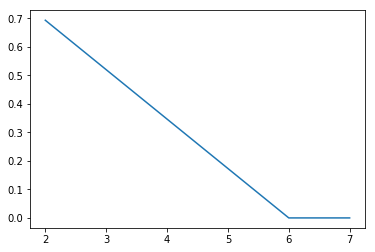

In [148]:
plt.plot([i for i in cluster_list], sse_list)
plt.show()

**Using pyspark.ml package**

[spark.ml doc](https://spark.apache.org/docs/2.2.0/ml-clustering.html#k-means)

In [213]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
import numpy as np
from math import sqrt

In [214]:
def error(feature, prediction, centers):
    center = centers[prediction]
    return (prediction, sqrt(np.sum(((feature - center).values)**2)))

In [215]:
# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(dataset)

In [216]:
##### the input is a dataframe
df = sqlContext.createDataFrame([
    (0.0, 0.0, 0.1),
    (0.1, 0.1, 0.1),
    (0.2, 0.2, 0.2),
    (9.0, 9.0, 9.0),
    (9.1, 9.1, 9.1),
    (9.2, 9.2, 9.2)
], ["col1", "col2", "col3"])

##### Create train dataframe
# using features in the column feature using vectorAssembler 
vectorAssembler = VectorAssembler(inputCols = ['col1','col2','col3'], outputCol = 'features')
train_df = vectorAssembler.transform(df)
train_df2 = train_df.select('features')

train_df.show()

+----+----+----+-------------+
|col1|col2|col3|     features|
+----+----+----+-------------+
| 0.0| 0.0| 0.1|[0.0,0.0,0.1]|
| 0.1| 0.1| 0.1|[0.1,0.1,0.1]|
| 0.2| 0.2| 0.2|[0.2,0.2,0.2]|
| 9.0| 9.0| 9.0|[9.0,9.0,9.0]|
| 9.1| 9.1| 9.1|[9.1,9.1,9.1]|
| 9.2| 9.2| 9.2|[9.2,9.2,9.2]|
+----+----+----+-------------+



In [221]:
train_df2.show()

+-------------+
|     features|
+-------------+
|[0.0,0.0,0.1]|
|[0.1,0.1,0.1]|
|[0.2,0.2,0.2]|
|[9.0,9.0,9.0]|
|[9.1,9.1,9.1]|
|[9.2,9.2,9.2]|
+-------------+



In [222]:
train_df2.take(2)

[Row(features=DenseVector([0.0, 0.0, 0.1])),
 Row(features=DenseVector([0.1, 0.1, 0.1]))]

In [217]:
# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(train_df)

In [223]:
train_df

DataFrame[col1: double, col2: double, col3: double, features: vector]

In [218]:
# Evaluate clustering by computing Within Set Sum of Squared Errors.
# when using compute cost, we can use dataframe with all the features.
wssse = model.computeCost(train_df)
print("Within Set Sum of Squared Errors = " + str(wssse))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Within Set Sum of Squared Errors = 0.10666666666661213
Cluster Centers: 
[ 9.1  9.1  9.1]
[ 0.1         0.1         0.13333333]


In [220]:
# an alternative to calculate SSE if computeCost is not available
# when using self-defined function, the input can only be the dataframe with feature column
def error(feature, prediction, centers):
        center = centers[prediction]
        print(feature)
        print(center)
        return (prediction, sqrt(np.sum(((feature - center).values)**2))) 

transformed = model.transform(train_df2).rdd.map(tuple)
wssse = transformed.map(lambda point: error(point[0],point[1],centers)).values().sum()
wssse

0.6813873182925777

In [202]:
def find_cluster_number(cluster_list, mydf, seed):
    """try out different cluster number for kmeans and get the SSE"""

    # Evaluate clustering by computing Within Set Sum of Squared Errors
    def error(feature, prediction, centers):
        center = centers[prediction]
        return (prediction, sqrt(np.sum(((feature - center).values)**2)))
    
    sse_list = []
    for i in cluster_list:
        # Build the model (cluster the data)
        kmeans = KMeans().setK(i).setSeed(seed)
        model = kmeans.fit(mydf)
        
        # cluster center
        centers = model.clusterCenters()
        
        transformed = model.transform(mydf).rdd.map(tuple)
        wssse = transformed.map(lambda point: error(point[0],point[1],centers)).values().sum()
        sse_list.append(wssse)
        print("For cluster = "+str(i)+", the within Set Sum of Squared Error = " + str(wssse))                
       
    return sse_list

In [206]:
model.transform(train_df).show()#.rdd.map(tuple)

+----+----+----+-------------+----------+
|col1|col2|col3|     features|prediction|
+----+----+----+-------------+----------+
| 0.0| 0.0| 0.1|[0.0,0.0,0.1]|         1|
| 0.1| 0.1| 0.1|[0.1,0.1,0.1]|         1|
| 0.2| 0.2| 0.2|[0.2,0.2,0.2]|         1|
| 9.0| 9.0| 9.0|[9.0,9.0,9.0]|         0|
| 9.1| 9.1| 9.1|[9.1,9.1,9.1]|         0|
| 9.2| 9.2| 9.2|[9.2,9.2,9.2]|         0|
+----+----+----+-------------+----------+



In [204]:
cluster_list = range(2,8)
sse_list = find_cluster_number(cluster_list, train_df2, 123)

For cluster = 2, the within Set Sum of Squared Error = 0.6813873182925777
For cluster = 3, the within Set Sum of Squared Error = 0.5081822375356906
For cluster = 4, the within Set Sum of Squared Error = 0.3146264369941966
For cluster = 5, the within Set Sum of Squared Error = 0.14142135623730953
For cluster = 6, the within Set Sum of Squared Error = 0.0
For cluster = 7, the within Set Sum of Squared Error = 0.0


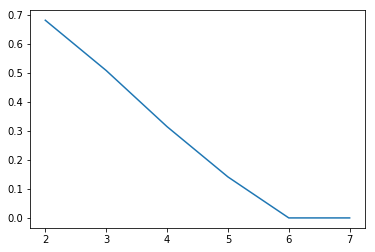

In [182]:
plt.plot([i for i in cluster_list], sse_list)
plt.show()

In [211]:
def fit_kmeans(cluster_num, mydf, seed):
    
    # Trains a k-means model.
    kmeans = KMeans().setK(2).setSeed(seed)
    model = kmeans.fit(mydf)
    
    # add cluster result
    final_df = model.transform(mydf)
    
    return final_df

In [212]:
final_df = fit_kmeans(2, train_df, 123)
final_df.show()

+----+----+----+-------------+----------+
|col1|col2|col3|     features|prediction|
+----+----+----+-------------+----------+
| 0.0| 0.0| 0.1|[0.0,0.0,0.1]|         0|
| 0.1| 0.1| 0.1|[0.1,0.1,0.1]|         0|
| 0.2| 0.2| 0.2|[0.2,0.2,0.2]|         0|
| 9.0| 9.0| 9.0|[9.0,9.0,9.0]|         1|
| 9.1| 9.1| 9.1|[9.1,9.1,9.1]|         1|
| 9.2| 9.2| 9.2|[9.2,9.2,9.2]|         1|
+----+----+----+-------------+----------+



> **Normalize column for pyspark dataframe**

In [23]:
df = sqlContext.createDataFrame([
    (0.0, 1.0),
    (1.0, 0.0),
    (2.0, 1.0),
    (0.0, 2.0),
    (0.0, 1.0),
    (2.0, 0.0)
], ["col1", "col2"])

In [24]:
df.show()

+----+----+
|col1|col2|
+----+----+
| 0.0| 1.0|
| 1.0| 0.0|
| 2.0| 1.0|
| 0.0| 2.0|
| 0.0| 1.0|
| 2.0| 0.0|
+----+----+



[StackOverFlow](https://stackoverflow.com/questions/47624129/how-to-standardize-one-column-in-spark-using-standardscaler)

In [35]:
from pyspark.sql.functions import stddev, mean, col

sample_df = sqlContext.createDataFrame([(1, ), (2, ), (3, )]).toDF("age")
sample_df.show()

+---+
|age|
+---+
|  1|
|  2|
|  3|
+---+



In [37]:
nor_df = sample_df.select(mean("age").alias("mean_age"), stddev("age").alias("stddev_age")).crossJoin(sample17).withColumn("age_scaled" , (col("age") - col("mean_age")) / col("stddev_age"))

In [39]:
nor_df2 = nor_df.select('age','age_scaled')

In [40]:
nor_df2.show()

+---+----------+
|age|age_scaled|
+---+----------+
|  1|      -1.0|
|  2|       0.0|
|  3|       1.0|
+---+----------+



In [41]:
mean_age, sttdev_age = sample_df.select(mean("age"), stddev("age")).first()

sample_df.withColumn("age_scaled", (col("age") - mean_age) / sttdev_age).show()


+---+----------+
|age|age_scaled|
+---+----------+
|  1|      -1.0|
|  2|       0.0|
|  3|       1.0|
+---+----------+



[StackOverFlow](https://stackoverflow.com/questions/40337744/scalenormalise-a-column-in-spark-dataframe-pyspark)

[spark.ml doc: normalization](https://spark.apache.org/docs/1.6.0/ml-features.html#normalizer)

In [29]:
# probably need to vectorize the columns

# from pyspark.ml.feature import MinMaxScaler
# scaler = MinMaxScaler(inputCol="col1", outputCol="col1_nor", p=1.0)
# scalerModel = scaler.fit(df)
# scaledData = scalerModel.transform(df)

In [30]:
# probably need to vectorize the columns

# from pyspark.ml.feature import Normalizer

# dataFrame = sqlContext.read.format("libsvm").load("data/mllib/sample_libsvm_data.txt")

# # Normalize each Vector using $L^1$ norm.
# normalizer = Normalizer(inputCol="features", outputCol="normFeatures", p=1.0)
# l1NormData = normalizer.transform(dataFrame)
# l1NormData.show()

# # Normalize each Vector using $L^\infty$ norm.
# lInfNormData = normalizer.transform(dataFrame, {normalizer.p: float("inf")})
# lInfNormData.show()

> <a id='als'>**RecSys: Alternative Least Square**</a> 

In [226]:
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating

In [282]:
# Load and parse the data
train = sc.textFile("data/alstrain.data")
trainratings = train.map(lambda l: l.split(',')).map(lambda l: Rating(int(l[0]), int(l[1]), float(l[2])))

In [283]:
test = sc.textFile("data/alstest.data")
testratings = test.map(lambda l: l.split(',')).map(lambda l: (int(l[0]), int(l[1])))

In [284]:
trainratings.collect()

[Rating(user=1, product=1, rating=5.0),
 Rating(user=1, product=2, rating=1.0),
 Rating(user=1, product=3, rating=5.0),
 Rating(user=1, product=4, rating=1.0),
 Rating(user=2, product=1, rating=5.0),
 Rating(user=2, product=2, rating=1.0),
 Rating(user=2, product=3, rating=5.0),
 Rating(user=2, product=4, rating=1.0),
 Rating(user=3, product=1, rating=1.0),
 Rating(user=3, product=2, rating=5.0),
 Rating(user=3, product=3, rating=1.0),
 Rating(user=3, product=4, rating=5.0),
 Rating(user=4, product=1, rating=1.0),
 Rating(user=4, product=2, rating=5.0),
 Rating(user=4, product=3, rating=1.0)]

In [274]:
testratings.collect()

[(4, 4)]

In [275]:
# Build the recommendation model using Alternating Least Squares
rank = 10
numIterations = 10
model = ALS.train(trainratings, rank, numIterations)

In [276]:
# Evaluate the model on training data
# testdata = ratings.map(lambda p: (p[0], p[1]))
predictions = model.predictAll(testratings).map(lambda r: ((r[0], r[1]), r[2]))

In [278]:
predictions.collect()

[((4, 4), 3.9456003394711496)]

In [240]:
ratesAndPreds = testratings.map(lambda r: ((r[0], r[1]), r[2])).join(predictions)
MSE = ratesAndPreds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
print("Mean Squared Error = " + str(MSE))

# Save and load model
# model.save(sc, "target/tmp/myCollaborativeFilter")
# sameModel = MatrixFactorizationModel.load(sc, "target/tmp/myCollaborativeFilter")

Mean Squared Error = 1.5634715432297673e-05


In [279]:
ratesAndPreds.take(5)

[((3, 3), (1.0, 1.0007994972612164)),
 ((4, 2), (5.0, 4.994243054218451)),
 ((1, 2), (1.0, 1.0000286098526114)),
 ((1, 3), (5.0, 4.997274399460885)),
 ((1, 4), (1.0, 1.0001120609765135))]

---

# <a id='refer'>Reference</a>

* [Complete Guide on DataFrame Operations in PySpark](https://www.analyticsvidhya.com/blog/2016/10/spark-dataframe-and-operations/)
* [Introduction to DataFrames - Python](https://docs.databricks.com/spark/latest/dataframes-datasets/introduction-to-dataframes-python.html)